<a href="https://www.kaggle.com/code/mahendrasinghrajpoot/effects-of-gender-on-heart-rate?scriptVersionId=115689635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Importing the important libraries into the dataset

In [1]:
 import pandas as pd #loading the pandas libraries into the dataframe
 import numpy as numpy #importing the important libararies into the dataframe
 import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#data = pd.read_csv('/content/summative dataset.xlsx',encoding='latin1',error_bad_lines=False)

In [4]:
#data.shape #when getting errors tried to remove the bad lines so the dataset gets removed and reduced to only 96 from 116

In [5]:
data_2 = pd.read_csv('/kaggle/input/analyzing-the-effects-of-gender-on-hrmax/summative_dataset_csv.csv') #loading again the csv when convertiing right from the excel

In [6]:
data_2.shape #when finding out the data shape after laoding the data into the its rows gets replicated into the bigger dataframe

(687, 5)

In [7]:
data_2.head() #finding out the dataframe shape

,sex,age,hrmax,status,Unnamed: 4
0,male,52.0,147.0,athlete,NaN
1,female,51.0,149.0,athlete,NaN
2,male,69.0,131.0,athlete,NaN
3,male,54.0,147.0,athlete,NaN
4,male,42.0,162.0,athlete,NaN


In [8]:
data_3 = data_2.iloc[:117,:4] #slicing the dataframe in the way we want it to loaded in the dataframe 

In [9]:
data_3.shape #finding out the shape after loading the dataset

(117, 4)

In [10]:
data_3.head()

,sex,age,hrmax,status
0,male,52.0,147.0,athlete
1,female,51.0,149.0,athlete
2,male,69.0,131.0,athlete
3,male,54.0,147.0,athlete
4,male,42.0,162.0,athlete


In [11]:
data_3.describe()

,age,hrmax
count,117.000000,117.000000
mean,52.042735,163.162393
std,8.246622,10.313999
min,34.000000,131.000000
25%,45.000000,158.000000
50%,52.000000,163.000000
75%,58.000000,170.000000
max,70.000000,185.000000


In [12]:
data_3.isnull().sum()

sex       0
age       0
hrmax     0
status    0
dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

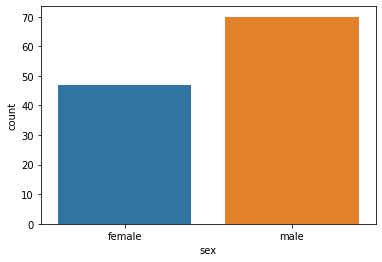

In [13]:
sns.countplot(data_3["sex"], order=data_3["sex"].value_counts(ascending=True).index)

<Figure size 1080x576 with 0 Axes>

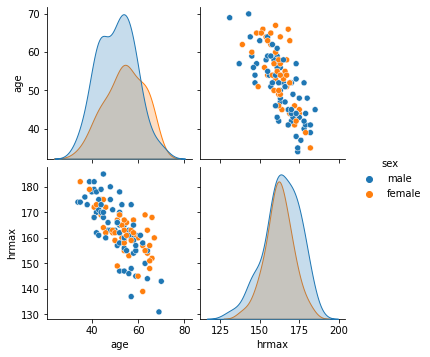

In [14]:
import matplotlib.pyplot as plt # loading the libraries
plt.figure(figsize=(15,8))
sns.pairplot(data_3, hue='sex')

In [15]:
from collections.abc import AsyncGenerator
#creating the list of variable who are less than 50
less_than = [] #creating an empty list
greater_than = [] #creating the list of greater than variable

#filtering the age from the dataset
for i in data_3['age']:
  if i < 50:
    less_than.append(i)
  else:
    greater_than.append(i)



In [16]:
len(less_than)

43

In [17]:
len(greater_than)

74

In [18]:
#calculating the percentage of total number of participant who are less that the age of the 50 and greater that the age of 50
print((len(less_than)/117)*100)
print((len(greater_than)/117*100))

#if we select the 50 as the threshold in our dataset then we can deduce the following conclusion form the dataset.
#here we can say that there are more number of people who have the age greater than 50 in our dataset where there are less number of people with age less than 50

36.75213675213676
63.24786324786324


In [19]:
hrmax = [] #calculating the hrmax from the solution 

for i in data_3['age']:
  hrmax.append(200-i)


In [20]:
for i in data_3['hrmax']:
  if i == hrmax:
    print('True')
  else:
    print('False')

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


With the above iteration we can say that the calcualtion that is done to calcualte the hrmax is different from what is done using the formula that is calculated by substracting the values from the 200, but when we applied the similar formula the values that we are getting is very different to what is expected or were provided to us.

In [21]:
data_3.status.value_counts()

non        60
athlete    57
Name: status, dtype: int64

How to find the colinearity based on the groups.

In [22]:
group_by = data_3.groupby('sex')['hrmax'].mean()

In [23]:
group_by.head()

sex
female    162.106383
male      163.871429
Name: hrmax, dtype: float64

In [24]:
group_by_age = data_3.groupby('sex')['age'].mean()
print(group_by_age)

sex
female    54.085106
male      50.671429
Name: age, dtype: float64


In [25]:
#adding the predicted columns to the dataframe
hrmax_p = []

for i in data_3['age']:
  hrmax_p.append(220-i)

In [26]:
hrmax_pre = pd.DataFrame(hrmax_p)

In [27]:
hrmax_pre.shape

(117, 1)

In [28]:
hrmax_pre.head()

,0
0,168.0
1,169.0
2,151.0
3,166.0
4,178.0


In [29]:
data_3.shape

(117, 4)

In [30]:
len(hrmax_p)

117

In [31]:
frmaes = [data_3,hrmax_pre] #creating the list of dataframes present in the dataset in order to concatinate it in the system.

In [32]:
#creating new dataframe
data_5 = pd.concat(frmaes,axis=1) #it is important to define the status of the function be it 0 or some other that we have in it.

In [33]:
data_5.rename(columns={0:'hrmax_pre'},inplace=True)

In [34]:
data_5.tail()

,sex,age,hrmax,status,hrmax_pre
112,female,67.0,160.0,non,153.0
113,male,48.0,180.0,non,172.0
114,male,45.0,185.0,non,175.0
115,male,52.0,178.0,non,168.0
116,male,57.0,173.0,non,163.0


# starting off with the statistical test

In [35]:
data_3.head()

,sex,age,hrmax,status
0,male,52.0,147.0,athlete
1,female,51.0,149.0,athlete
2,male,69.0,131.0,athlete
3,male,54.0,147.0,athlete
4,male,42.0,162.0,athlete


In [36]:
data_4 = data_3.copy()

In [37]:
data_4 = data_4.replace({'male':0,'female':1})

In [38]:
data_4.head()

,sex,age,hrmax,status
0,0,52.0,147.0,athlete
1,1,51.0,149.0,athlete
2,0,69.0,131.0,athlete
3,0,54.0,147.0,athlete
4,0,42.0,162.0,athlete


In [39]:
import statsmodels.api as sm

X = data_4[['sex','age']]
y= data_4['hrmax']

Starting with modelling the dataset using the machine learning approach

In [40]:
model = sm.OLS(y, X).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  hrmax   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              1319.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                    5.10e-80
Time:                        21:24:10   Log-Likelihood:                         -576.58
No. Observations:                 117   AIC:                                      1157.
Df Residuals:                     115   BIC:                                      1163.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -3.7536      6.474     -0.580      0.563     -16.578       9.071
age            3.0666      0.078     39.373      0.000       2.912       3.221
==============================================================================
Omnibus:                        2.571   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.716
Skew:                          -0.001   Prob(JB):                        0.424
Kurtosis:                       2.407   Cond. No.                         109.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""